# Staż Techmo - zadania

Poniżej znajdują się 3 zadania, które należy rozwiązać poprzez napisanie odpowiedniego kodu (w komórkach pod treścią zadania w pliku **staz.ipynb**), pozwalającego na wykonanie wymaganych w zadaniu obliczeń i prezentacje wyników. Przy rozwiązywaniu zadań można korzystać z dowolnych paczek dostępnych w managerze Pip np. numpy, pandas, librosa itp.

Notebook z rozwiązaniem oraz dane wrzuć na swojego githuba razem z plikiem *requirements.txt* pozwalającym na łatwą instalacje wszystkich wymaganych paczek.

## 1. Przetwarzanie sygnałów

* Wczytaj plik dźwiękowy *audio.wav*
* Wstaw widget z audioplayerem tak, aby można było odsłuchać plik
* Narysuj **oscylogram**
* Wyznacz i narysuj przebieg tonu podstawowego **F0**
* Wyznacz i narysuj w skali decybelowej krótkoczasowe widmo sygnału (**STFT**). Dobierz odpowiednie wg Ciebie parametry analizy. Uzasadnij swój wybór.
* Wyznacz i narysuj w skali decybelowej wartości **MFCC** (13 współczynników). Parametry analizy pozostaw takie jak w kroku poprzednim.

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [2]:
import tensorflow_io as tfio
import tensorflow as tf

In [3]:
# 1 sposób

In [4]:
audio_tf = tfio.audio.AudioIOTensor("audio.wav", dtype='float32')

In [5]:
audio_tensor = tf.squeeze(audio_tf.to_tensor(), axis=[-1])

In [6]:
from IPython.display import Audio
Audio(audio_tensor.numpy(), rate=audio_tf.rate.numpy())

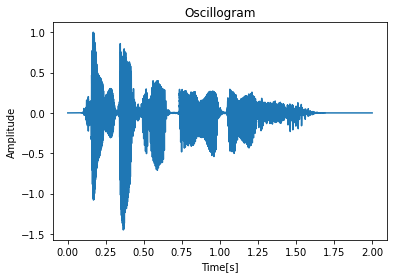

In [7]:
# Oscylogram

tensor = tf.cast(audio_tensor, tf.float32)
tensor /= tf.reduce_max(tensor).numpy()
time_len = int(tensor.numpy().shape[0]/audio_tf.rate.numpy())
x_time = np.linspace(0, time_len, num=tensor.shape[0])

ax = plt.gca()
plt.plot(x_time, tensor.numpy())
ax.set_title("Oscillogram")
ax.set_xlabel("Time[s]")
ax.set_ylabel("Amplitude")
plt.show()

In [8]:
# 2 sposób
audio, sample_rate = librosa.load("audio.wav")

In [9]:
Audio(audio, rate=sample_rate)

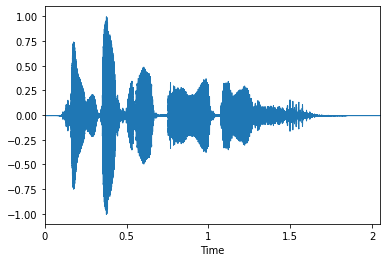

In [10]:
librosa.display.waveplot(audio, sr=sample_rate)

In [11]:
# F0

In [12]:
f0, _, _ = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

In [13]:
# średnia wartość f0
mean_f0 = f0[~np.isnan(f0)].mean()
mean_f0

187.6499782396359

In [14]:
times = librosa.times_like(f0)

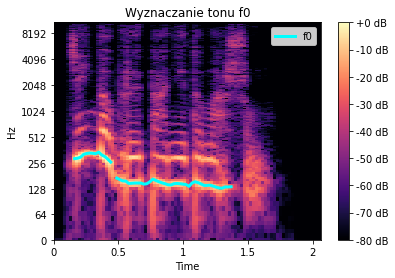

In [15]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis="time", y_axis="log", ax=ax)
ax.set(title="Wyznaczanie tonu f0")
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label="f0", color="cyan", linewidth=3)
ax.legend(loc="upper right")

In [16]:
# STFT

In [17]:
# używając mniejszego przedziału udało się uzyskać
# większą rozdzielczość
# ustawiony hop-length skutkuje wysoką rozdzielczością
n_fft = 512
hop_length = 160
X = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)

In [18]:
S = librosa.amplitude_to_db(abs(X))

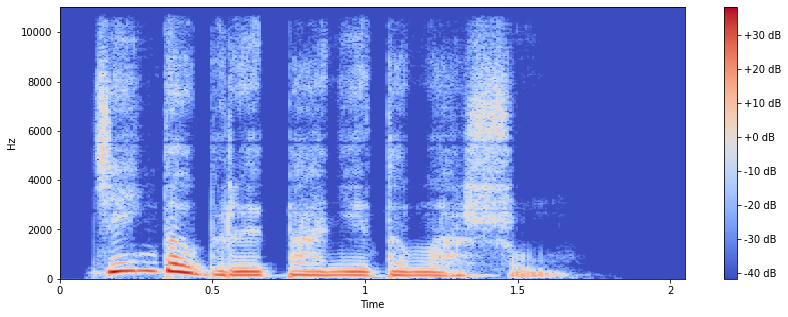

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(
    S, 
    sr=sample_rate, 
    hop_length=hop_length, 
    x_axis="time", 
    y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")

In [20]:
# MFCC

In [21]:
mfcc = librosa.feature.mfcc(
    audio, 
    sr=sample_rate,
    n_mfcc=13,
    hop_length=hop_length,
    n_fft=n_fft
)

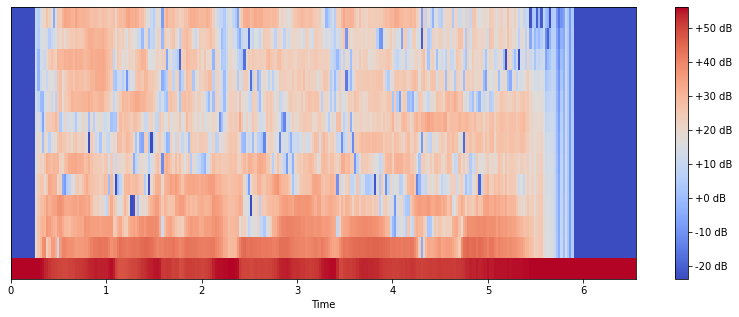

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(
    librosa.amplitude_to_db(mfcc), 
    sr=sample_rate, 
    x_axis="time"
)
plt.colorbar(format="%+2.0f dB")

## 2. Metryki

W pliku *predicted.json* zapisane są wyniki rozpoznania systemu ASR, służącego do rozpoznawania cyfr.

Dla każdej cyfry od 0 do 9 w słowniku przedstawione są wartości, jakie system rozpoznał dla kolejnych nagrań danej cyfry. 

Oblicz i przedstaw w formie tabeli **macierz pomyłek** (confusion matrix) oraz oblicz **skuteczność** systemu.

In [23]:
import pandas as pd

In [24]:
data = pd.io.json.read_json("predicted.json")

In [25]:
data

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,0,7,2,3,4,5,6,7,8,5
2,8,1,2,3,4,5,6,7,8,9
3,0,1,2,3,4,5,9,7,8,9
4,5,1,2,3,4,5,6,7,8,9
5,0,1,2,3,3,9,6,7,8,9
6,0,1,2,3,4,5,6,7,8,9
7,0,1,2,4,4,5,6,7,8,9
8,0,1,2,3,7,5,6,7,8,9
9,0,1,2,3,4,9,6,7,8,9


In [26]:
data_np = data.to_numpy()

In [27]:
confusion_matrix = data\
    .apply(pd.value_counts)\
    .fillna(0)\
    .astype("int")\
    .transpose()

In [28]:
# rows - actual, columns - predicted
confusion_matrix

,0,1,2,3,4,5,6,7,8,9
0,47,0,0,0,0,1,0,1,1,0
1,0,45,0,0,1,0,0,3,1,0
2,1,0,45,0,0,1,0,0,3,0
3,0,0,0,45,3,0,2,0,0,0
4,0,0,0,1,44,0,2,3,0,0
5,0,0,0,0,0,40,0,0,0,10
6,0,0,0,0,0,0,47,0,0,3
7,0,0,0,0,0,0,0,49,1,0
8,0,0,0,0,0,0,0,0,50,0
9,0,0,0,0,0,3,0,0,0,47


In [29]:
accurate_predictions = np.trace(confusion_matrix.to_numpy())
number_of_predictions = data.shape[0]*data.shape[1]

accuracy = accurate_predictions / number_of_predictions

print(f"accuracy: {accuracy*100}%")

accuracy: 91.8%


## 3. Algebra

W plikach tekstowych `matrix_P.txt` oraz `matrix_Q.txt` znajduje się po 8 pomiarów 4-wymiarowej zmiennej (8 wierszy po 4 wartości).
* Wczytaj macierze do osobnych zmiennych `P` , `Q`.
* Korzystając z biblioteki `numpy` zaimplementuj funkcję obliczającą wzór:

$$
D_{KL}(P, Q) = \frac{1}{2} \mathrm{tr}\{(\boldsymbol{\Sigma}_p^{-1} + \boldsymbol{\Sigma}_q^{-1})(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)(\boldsymbol{\mu}_p - \boldsymbol{\mu}_q)^T + \boldsymbol{\Sigma}_p \boldsymbol{\Sigma}_q^{-1} + \boldsymbol{\Sigma}_q \boldsymbol{\Sigma}_p^{-1} - 2 \boldsymbol{I}\}
$$

gdzie:

$\mathrm{tr}$ – ślad macierzy (trace)

$\boldsymbol{\Sigma}$ – macierz kowariancji

$\boldsymbol{\mu}$ – uśredniony wektor ze wszystkich pomiarów

$\boldsymbol{I}$ – macierz jednostkowa

> Dla podanych danych funkcja powinna zwrócić wartość ok. 6.03

In [30]:
P = np.loadtxt("matrix_P.txt")
Q = np.loadtxt("matrix_Q.txt")

In [31]:
def Dkl(P: np.ndarray, Q: np.ndarray) -> float:
    Q_mean = np.mean(Q, axis=0)
    P_mean = np.mean(P, axis=0)
    Q_cov = np.cov(Q.T)
    P_cov = np.cov(P.T)
    Q_cov_inv = np.linalg.inv(Q_cov)
    P_cov_inv = np.linalg.inv(P_cov)
    size = P_cov.shape[0]
    
    means_diff = P_mean - Q_mean
    means_diff = np.expand_dims(means_diff, axis=1)
    
    return 1./2 * np.trace( 
        (P_cov_inv + Q_cov_inv)@means_diff@means_diff.T
        + P_cov@Q_cov_inv  
        + Q_cov@P_cov_inv 
        - 2.*np.identity(size)
    )

In [32]:
Dkl(P,Q)

6.033482453811379